In [11]:
import pandas as pd 
import matplotlib.pyplot as plt

covid_data=pd.read_csv('data/covid_data.csv')
va_data=pd.read_csv('data/country_vaccinations.csv')
covid_data=covid_data.groupby(['date','country'], as_index=False)[['confirmed','deaths','recovered']].sum()
covid_data['date']=pd.to_datetime(covid_data['date'])
covid_data['active']=covid_data['confirmed']-covid_data['deaths']-covid_data['recovered']
covid_data=covid_data.sort_values(by=['country','date'])
covid_data['daily_confirmed']=covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths']=covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered']=covid_data.groupby('country')['recovered'].diff()
va_data['date']=pd.to_datetime(va_data['date'])
va_data=vaccinations_data = va_data[['country', 'date', 'total_vaccinations', 'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations', 'vaccines']]
covid_df=covid_data.merge(va_data,how='left',on=['date','country'],)
covid_df.to_csv('data/covid_df.csv')



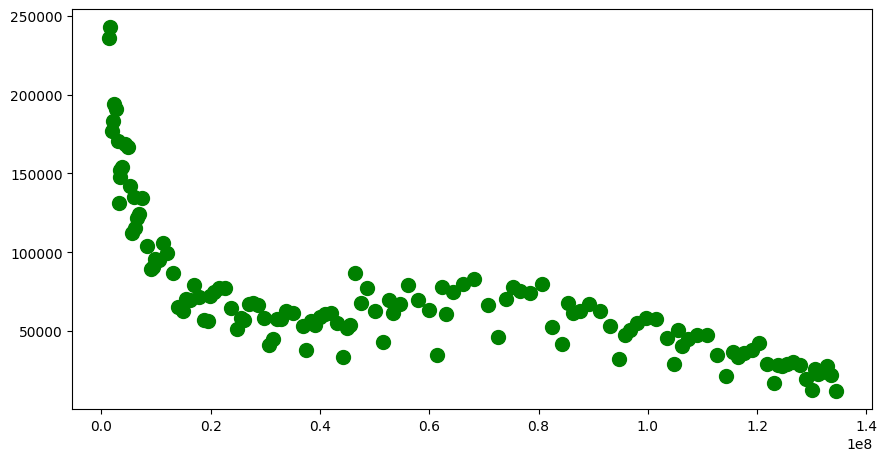

In [6]:
us_data=covid_df[covid_df['country']=='United States']
fig=plt.figure(figsize=(8,4))
axes=fig.add_axes([0,0,1,1])
axes.scatter(x=us_data['people_fully_vaccinated'],y=us_data['daily_confirmed'],s=100,marker='o',c='green')

([<matplotlib.patches.Wedge at 0x2393890bc10>,
 [Text(0.7665420934957, 0.9232622698341083, 'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.5931469540063179, 0.9263782655875661, 'Oxford/AstraZeneca'),
  Text(-1.0669756518152362, 0.26751253883407417, 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.9691397141646498, -0.5203539318856552, 'Oxford/AstraZeneca, Sinopharm/Beijing'),
  Text(-0.42855913880528995, -1.013082950476647, 'Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(0.162764772670222, -1.0878913680959192, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'),
  Text(0.6404448584916131, -0.894332367317463, 'Moderna, Pfizer/BioNTech'),
  Text(0.9150658010408986, -0.610454404329577, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing'),
  Text(1.03477305208093, -0.3731551027215323, 'Pfizer/BioNTech'),
  Text(1.092724197741022, -0.126308462389659, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V')],
 [Text(0.4471495545391

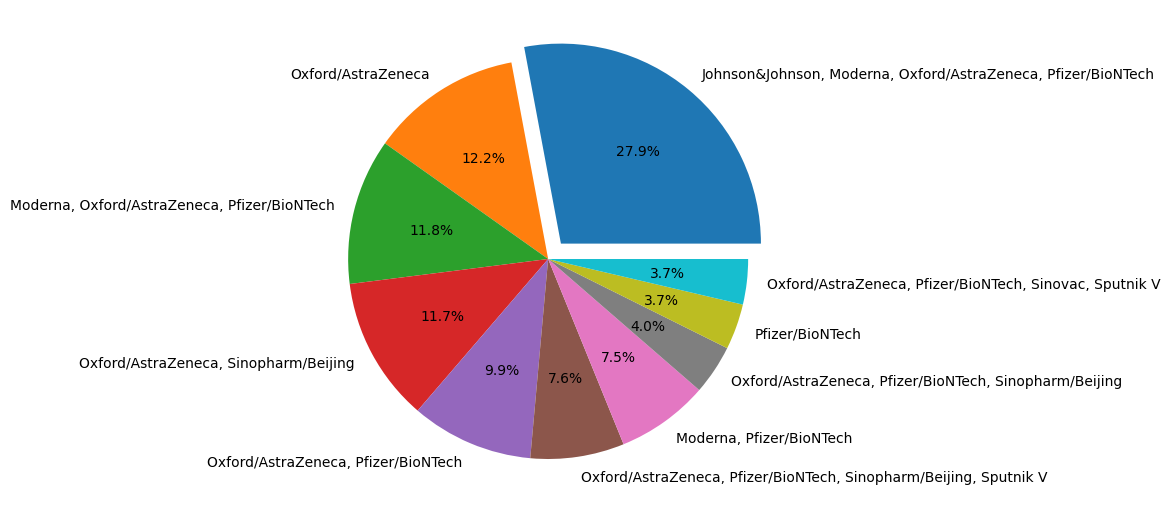

In [10]:
vaccine_combinations=covid_df['vaccines'].value_counts()[:10]
fig=plt.figure(figsize=(5,5))
axes=fig.add_axes([0,0,1,1])
axes.pie(
    vaccine_combinations, 
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode=[0.1,0,0,0,0,0,0,0,0,0]
    )